# Pymaceuticals Inc.
---

### Analysis

This project data shows the analysis of test results of 249 mice in 10 drug treatments incluing the placebo/harmless pill. Definite parameters help to make conclusion what can be used to make decision about anti-cancer medications.

The Conclusions through analysis from Pymaceutical animal study suggests:

1.Out of 4 drugs Capomulin and Ramicane was the top most effective at reducing tumor sizes.

2.There is positive correlation between the weight of the mice and the tumor size with correlation value of 0.84.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_mice=pd.merge(mouse_metadata,study_results, how="outer",on="Mouse ID")

# Display the data table for preview
data_frame=data_mice[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']]
data_frame.head()           


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
num_mice=len(data_mice['Mouse ID'].unique())
print (f'The number of mice is {num_mice} in this study.')

The number of mice is 249 in this study.


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
print(f'Number of mice: {num_mice}')
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=data_mice.loc[data_mice.duplicated(['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

Number of mice: 249


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data=data_mice.loc[data_mice["Mouse ID"]=="g989"]
duplicate_mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df=data_mice[data_mice['Mouse ID'].isin(duplicate_mice)==False]
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_mice_df['Mouse ID'].value_counts()
clean_mice_number=len(clean_mice)
clean_mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Drug Regimen group data
summary_df = data_mice.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug
regimen_mean = summary_df['Tumor Volume (mm3)'].mean()
regimen_median = summary_df['Tumor Volume (mm3)'].median()
regimen_stdev = summary_df['Tumor Volume (mm3)'].std()
regimen_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
grouped_summary_df = pd.DataFrame({'Mean': regimen_mean, 'Median': regimen_median,
                                   'Standard Deviation': regimen_stdev, 'SEM': regimen_sem})

grouped_summary_df.head()




,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df=clean_mice_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
agg_df.head()


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250')])

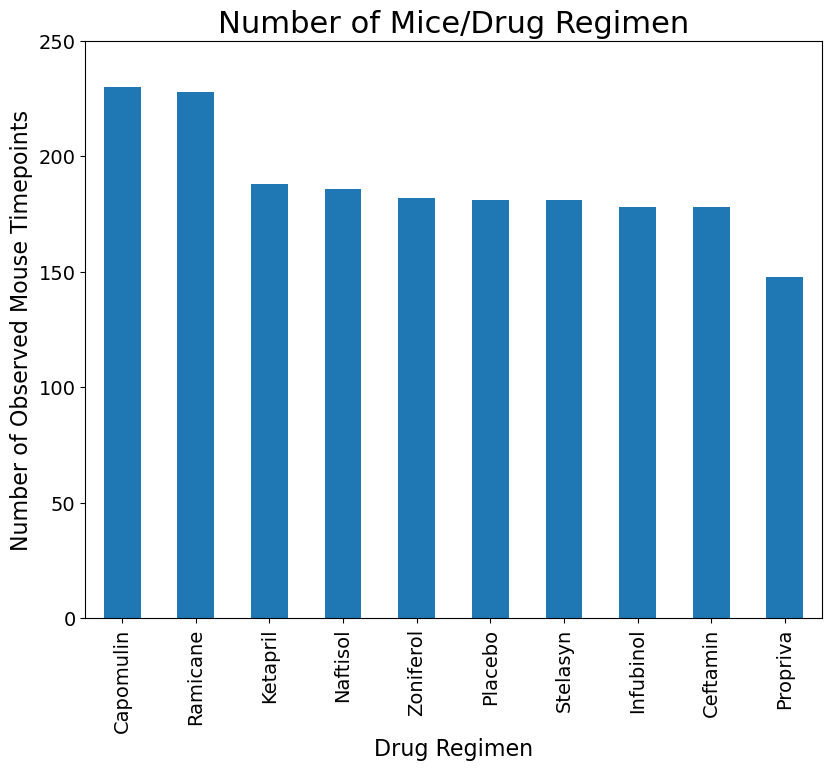

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_bar=clean_mice_df["Drug Regimen"].value_counts().plot(kind="bar",figsize=(9.5,7.5))
                                                                   
mice_bar.set_xlabel ("Drug Regimen",size=16)
mice_bar.set_ylabel("Number of Observed Mouse Timepoints", size=16)
plt.title("Number of Mice/Drug Regimen", size=22)
plt.ylim(0,max(clean_mice_df["Drug Regimen"].value_counts() + 20))                                                                 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)                                       

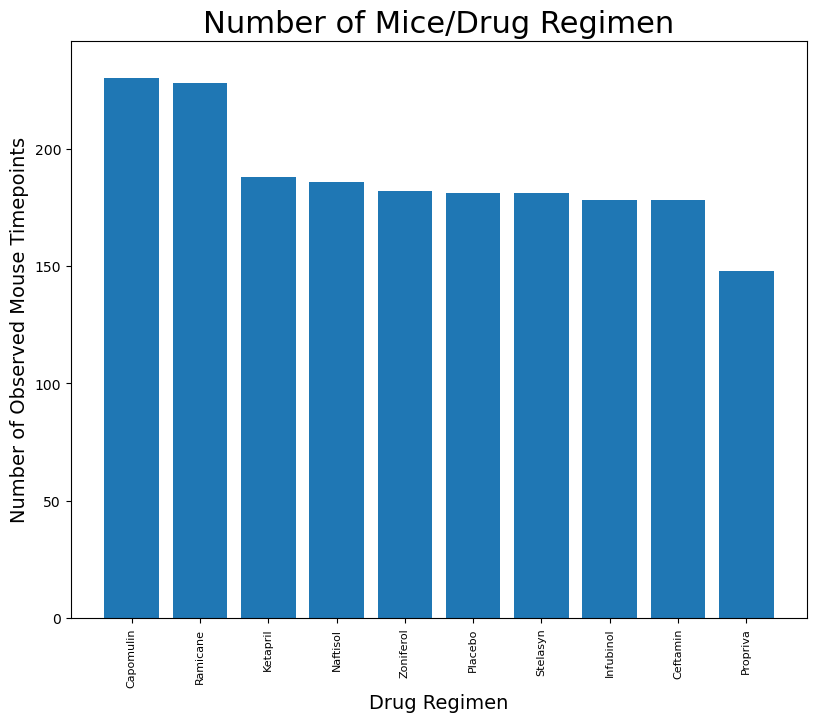

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen=clean_mice_df["Drug Regimen"].value_counts()

plt.figure(figsize=(9.5,7.5))
plt.bar(drug_regimen.index,drug_regimen.values)
plt.title("Number of Mice/Drug Regimen",size=22)
plt.xlabel("Drug Regimen", size=14)
plt.ylabel("Number of Observed Mouse Timepoints", size=14)
plt.ylim(0,max(clean_mice_df["Drug Regimen"].value_counts() + 16))
plt.xticks(rotation="vertical",fontsize=8)
plt.yticks(fontsize=10)

plt.show()

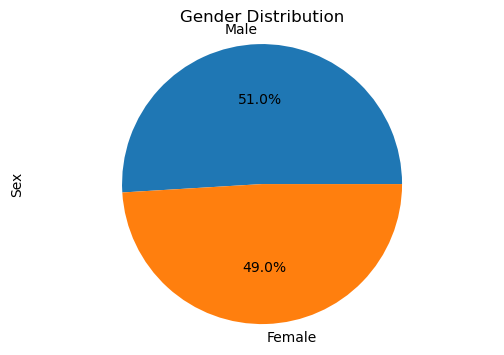

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_versus=clean_mice_df["Sex"].value_counts()

plt.figure
mice_bar=gender_versus.plot(kind="pie",title="Gender Distribution",y=gender_versus.index,autopct="%1.1f%%", figsize=(6,4),labels=gender_versus.index)
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

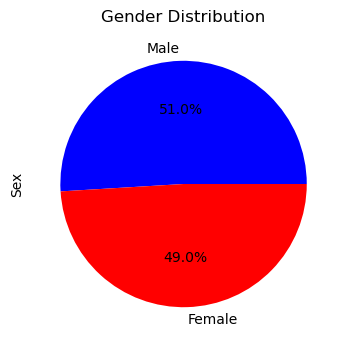

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors=["blue","red"]
labels=gender_versus.index
plt.figure(figsize=(6,4))
plt.pie(gender_versus, labels=labels, colors=colors,autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Gender Distribution")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
mouse_treatments = clean_mice_df.loc[(clean_mice_df["Drug Regimen"] == "Capomulin") | 
                                    (clean_mice_df["Drug Regimen"] == "Ramicane") |
                                    (clean_mice_df["Drug Regimen"] == "Infubinol") |
                                    (clean_mice_df["Drug Regimen"] == "Ceftamin"),
                                    ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)" ]]
mouse_treatments

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_treatments.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()
max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df= max_timepoint.merge(clean_mice_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]], on = ["Mouse ID", "Timepoint"], how = "left")
tumor_volume_df



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [14]:
# Putting treatments into a list for for loop (and later for plot labels)
def outliers(regimen):
    regimen_data = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    
# Determining outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = outliers("Capomulin")
ram = outliers("Ramicane")
inf = outliers("Infubinol")
ceft = outliers("Ceftamin")



Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


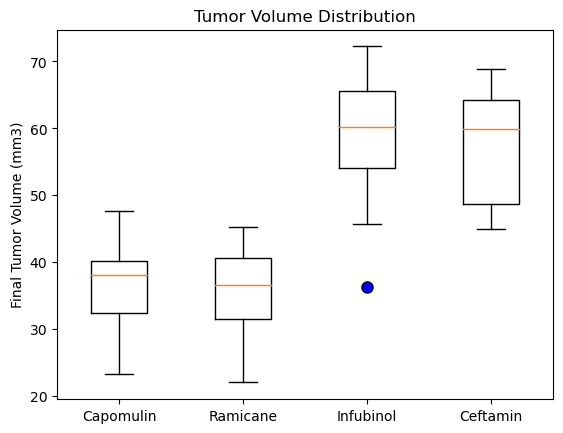

In [15]:
# Generating a box box plot that shows the distribution of the tumor volume for each treatment group.

blue_point=dict(markerfacecolor="blue", markersize=8)
plt.boxplot([cap,ram,inf,ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=blue_point)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution')

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

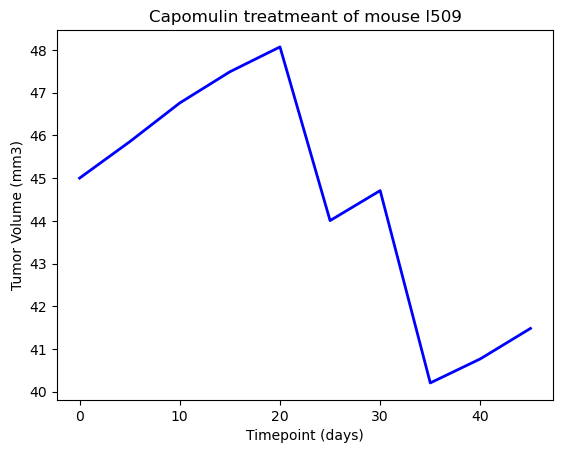

In [16]:
# Generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin",:]

forline_df = capo_mouse.loc[capo_mouse["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


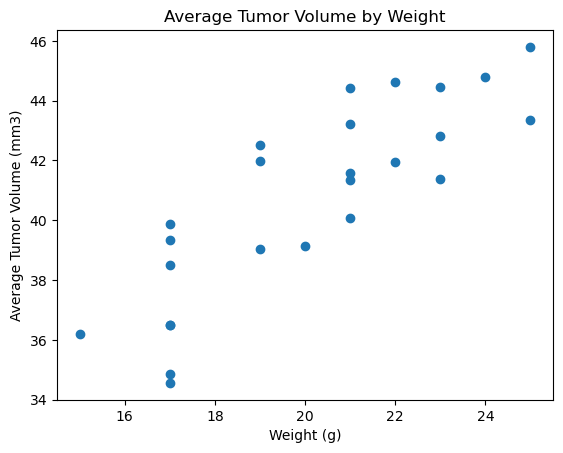

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capo_df = data_mice.loc[data_mice['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capo_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()



## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


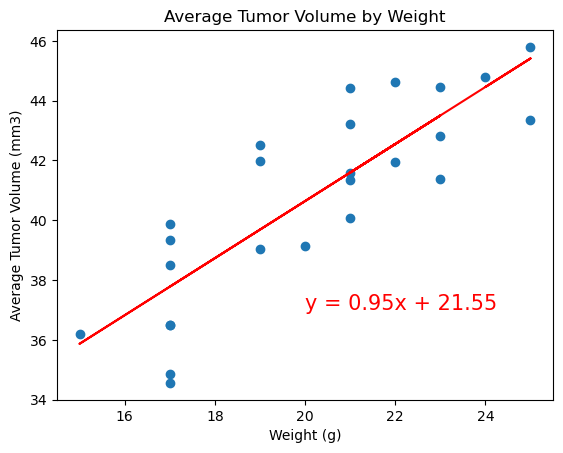

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Duplicate code for scatter plot from above:

capo_df = data_mice.loc[data_mice['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capo_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()



